# Customer segregation using KMeans clustering

To segragate the customer based on SGN and Revenue data, we'll be following the below mentioned steps.
1. Loading the data
2. Basic Data Visuaization
3. Data analysis
4. Exploratory Data Analysis 
5. Visualizing the data disctirbution among all the features
6. Finding out the correlation between the features
7. Feature Selection
8. Model Training
7. Using the Elbow method to validate the value of K

#### Step1: Load the necessary librarires

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from scipy.spatial.distance import cdist
import pickle


#### Step2: Load the data

In [89]:
df = pd.read_csv('..\dataset\dataset.csv')

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\4116137067.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [90]:
df

,SGN,Revenue
0,68512633,2.50311
1,70670183,2.50316
2,70868606,2.50344
3,69737922,2.50469
4,71237900,2.51195
...,...,...
4169,251233,10605.56274
4170,249609,10698.09641
4171,70008712,13304.52845
4172,70247586,15356.98418


#### Step3: Exploratory Data Analysis

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\1137910753.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



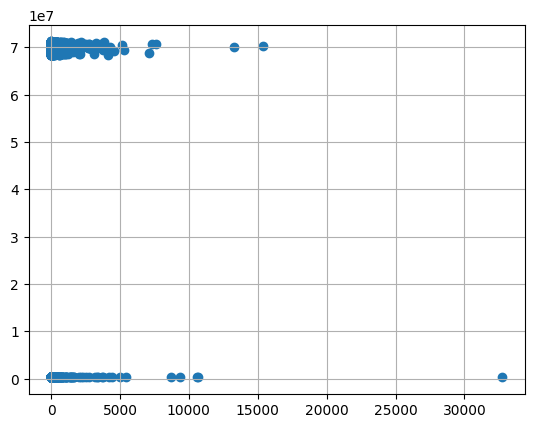

In [91]:
### Basic Data Visualization
data = df.to_numpy()
plt.scatter([data[:, 1]], data[:,0], cmap='rainbow')
plt.grid()

In [92]:
##### see the information in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SGN       4174 non-null   int64  
 1   Revenue   4174 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 65.3 KB


In [93]:
### check the basic data description
df.describe()

,SGN,Revenue
count,4.174000e+03,4174.000000
mean,6.373570e+07,191.110771
std,2.047073e+07,821.145833
min,2.479190e+05,2.503110
25%,6.969982e+07,8.003063
50%,7.041453e+07,28.158290
75%,7.081634e+07,112.353800
max,7.124033e+07,32732.438620


In [94]:
### data cleaning
df.isnull().sum()

SGN         0
Revenue     0
dtype: int64

In [95]:
df[df.duplicated(keep=False)]

,SGN,Revenue


In [96]:
### see the unique count of the columns
df['Revenue '].count(),df.shape,df.SGN.unique()

(np.int64(4174),
 (4174, 2),
 array([68512633, 70670183, 70868606, ..., 70008712, 70247586,   254787],
       shape=(4174,)))

Since the SGN column has all the continuous and unique values, hence there is no correlation between these two features.
<br>
Hence discarding the SGN column from now.

In [97]:
data = df['Revenue '].values
data = np.reshape(data, (len(data), 1))
data.shape

(4174, 1)

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\2570550344.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




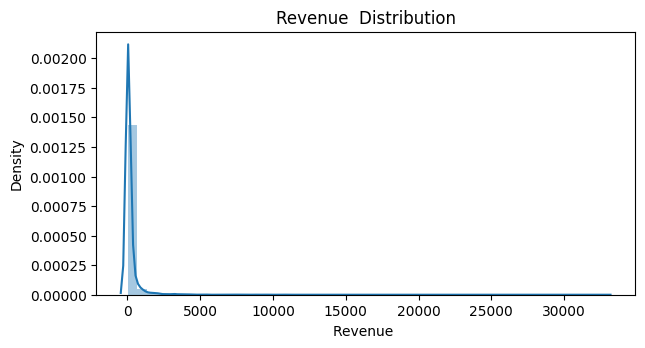

In [98]:
_ = df.pop('SGN')
# Visualize the distribution of each feature.
plt.figure(figsize=(12,16))
for i, j in enumerate(df.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

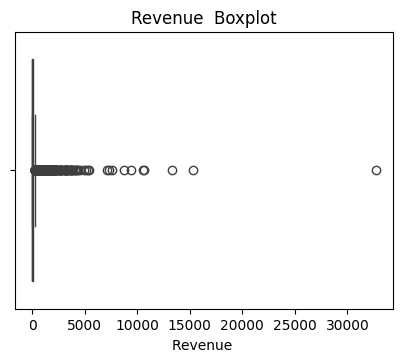

In [99]:
# Visualize the boxplot of each feature.
plt.figure(figsize=(12,10))
for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.show()

In [100]:
# ## check the feature mapping
# fig = plt.figure(figsize=(8,6))
# sns.scatterplot(x=data[:,1], y=data[:,1])
# plt.title('SGN vs. Revenue Scatterplot')
# plt.savefig('scatter.png')
# plt.show()

In [101]:
# pairplot = sns.pairplot(df, corner=True)
# plt.show(pairplot)

In [102]:
# ### check the correlation between the available features

# correlation_metrics=df.corr()
# fig = plt.figure(figsize=(14,9))
# sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
# plt.title('Correlation Between Variables', size=14)
# plt.show()


Skipping the correlation part, as we found all the values as unique in the SGN column
<br>
Hence, we can skip the SGN feature from the consideration.

#### Step4: Feature Selection

In [103]:
# data = data[:, 1] #### exclude the SGN feature from consideration 

#### Step5: Data Preprocessing

In [104]:
## Scale the data
scaler = MinMaxScaler()
data_train = np.reshape(data, (len(data), 1))
scaler.fit(data_train)
data_norm = scaler.transform(data_train)
data_norm

array([[0.00000000e+00],
       [1.52765348e-09],
       [1.00825130e-08],
       ...,
       [4.06417707e-01],
       [4.69126530e-01],
       [1.00000000e+00]], shape=(4174, 1))

As of now, randomly select the value of K, lets select k as 4 for now.
<br>

#### Step 6: Model Training

In [105]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_norm)

KMeans(n_clusters=4, random_state=42)

In [106]:
kmeans.cluster_centers_

array([[0.00306231],
       [0.30571303],
       [0.07428846],
       [1.        ]])

In [107]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 3], shape=(4174,), dtype=int32)

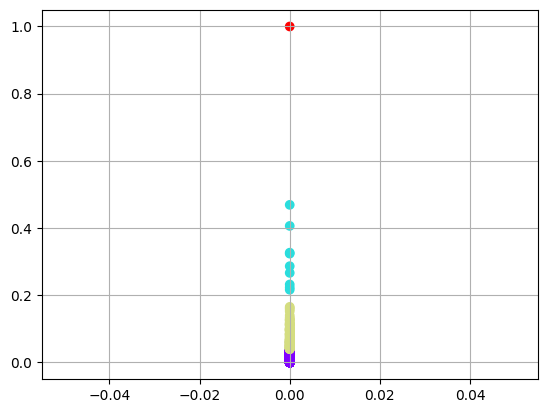

In [108]:
plt.scatter( np.zeros(len(data_norm)),data_norm,  c=kmeans.labels_, cmap='rainbow')
plt.grid()

#### Step7: Validate the value of K with Elbow method

Inertia values ::
1 : 2.626628622756242
2 : 1.6378836199546984
3 : 0.7014317855344953
4 : 0.3010450499964827
5 : 0.2543963097429204
6 : 0.12724223654846378
7 : 0.07716823970519815
8 : 0.06335586811062455
9 : 0.04455554009100276


C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\2176579225.py:25: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.



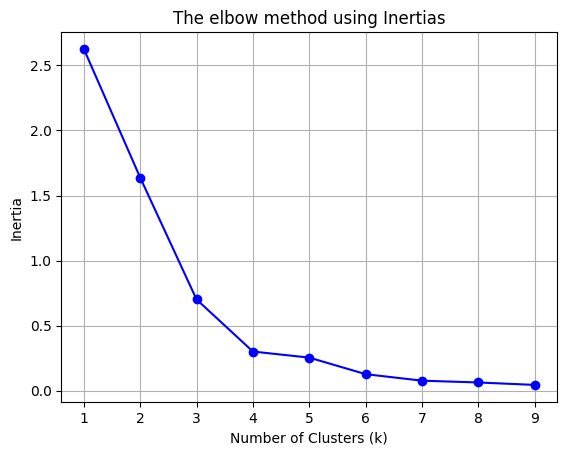

In [115]:
#### validation using the Elbow method
distortions = []
inertias  =[]
mapping1 = {}
mapping2 = {}

K = range(1, 10)

for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42).fit(data_norm)

    distortions.append(sum(np.mean(cdist(data_norm, kmeans_model.cluster_centers_, 'euclidean'), axis=1)**2)/data_norm.shape[0])

    inertias.append(kmeans_model.inertia_)

    mapping1[k] = (distortions[-1])
    mapping2[k] = inertias[-1]


print('Inertia values ::')

for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The elbow method using Inertias')
plt.grid()
plt.savefig(r'..\results\elbow.png')
plt.show()

Let us analyse the value of inertias, the value of intertia is getting constant beyond 6.
<br>
hence the perfect value of k could be 5 for this dataset.
<br>
Let us visualize the data eith different values of K

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\1423054625.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



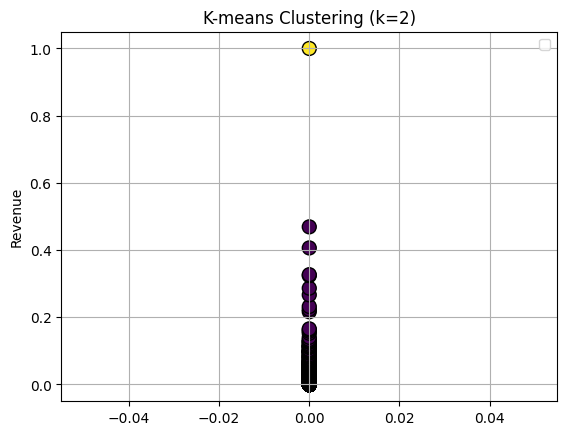

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\1423054625.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



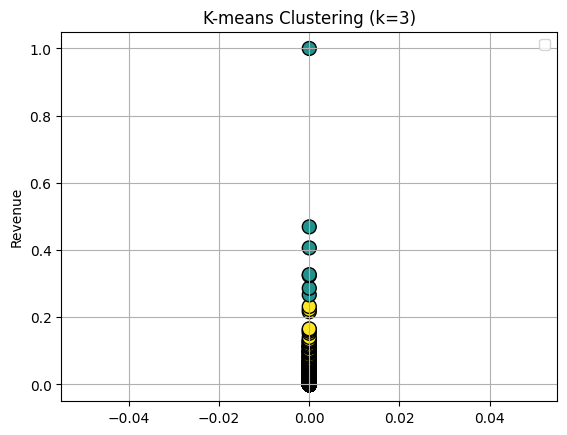

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\1423054625.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



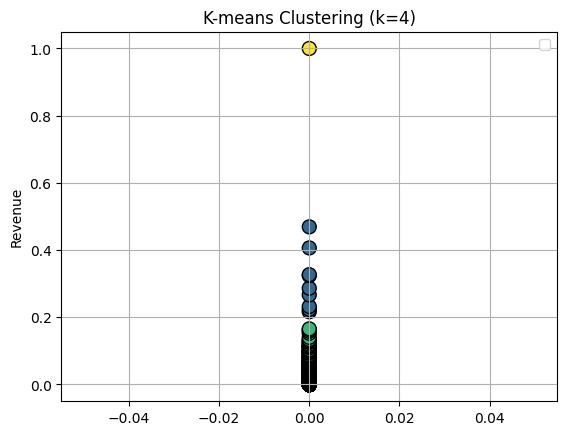

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\1423054625.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



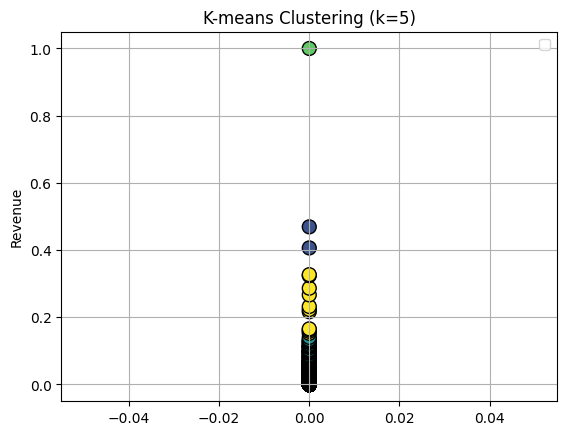

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\1423054625.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



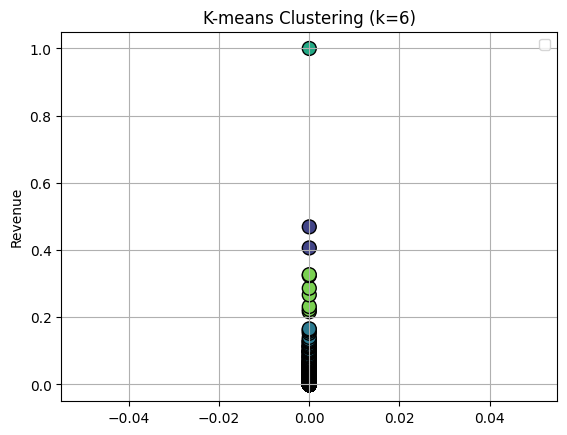

In [110]:
# Initialize a range of k values
k_range = range(2, 7)

# Fit and plot data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k,  random_state=42)
    y_kmeans = kmeans.fit_predict(data_norm)
    
    # Plot the clustered data points
    plt.scatter(np.zeros(len(data_norm)),data_norm, c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.title(f'K-means Clustering (k={k})')
    plt.ylabel('Revenue')
    plt.legend()
    plt.grid()
    plt.show()


As per Elbow method the optimized value of K for this dataset is 6,
<br>
Hence, re-train the model with K=5 and see the final results

#### Step8: Final Results

In [111]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_norm)
label = kmeans.fit_predict(data_norm)

In [112]:
### save the trained model
with open("..\model\kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

<>:2: SyntaxWarning:

invalid escape sequence '\m'

<>:2: SyntaxWarning:

invalid escape sequence '\m'

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\2377093073.py:2: SyntaxWarning:

invalid escape sequence '\m'



C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\1862941005.py:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_2584\1862941005.py:5: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



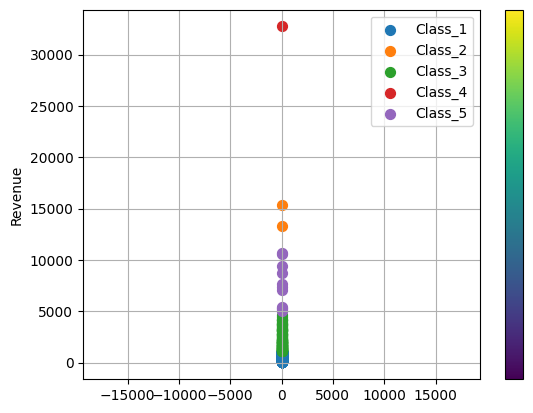

In [116]:
cmap = matplotlib.cm.get_cmap('rainbow', 5)
u_labels = np.unique(label)
for i in u_labels:
    data_len = len(data[label==i])
    plt.scatter( np.zeros(data_len), data[label==i],  cmap=cmap, marker='o',  s=50, label="Class_"+str(i+1))
plt.legend(loc="upper right")
plt.axis('equal')
plt.ylabel('Revenue')
plt.colorbar(ticks=[])
plt.grid()
plt.savefig(r"..\results\final_results.png")
plt.show()